In [1]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.ensemble import RandomForestClassifier

In [2]:
data = []

dog_folder = f"./Dogs"
cat_folder = f"./Cats"

dog_files = os.listdir(dog_folder)
cat_files = os.listdir(cat_folder)

print("Loading Data...")

for n, file in enumerate(dog_files):
    img = cv2.imread(f"{dog_folder}/{file}")
    resized_img = cv2.resize(img, (256, 256))
    data.append([resized_img, [0]])
    if n >= 1000:
        break

for n, file in enumerate(cat_files):
    img = cv2.imread(f"{cat_folder}/{file}")
    resized_img = cv2.resize(img, (256, 256))
    data.append([resized_img, [1]])
    if n >= 1000:
        break

Loading Data...


In [3]:
X = []
y = []
for array, label in data:
    X.append(array)
    y.append(label)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=True)
X_train, X_test, y_train, y_test = np.array(X_train), np.array(X_test), np.array(y_train), np.array(y_test)
X_train, X_test = X_train / 255.0, X_test / 255.0

In [4]:
activation = 'relu'
cnn_model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation=activation, padding='same', input_shape=(256, 256, 3)),
    BatchNormalization(),

    Conv2D(filters=32, kernel_size=(3, 3), activation=activation, kernel_initializer='he_uniform'),
    BatchNormalization(),
    MaxPooling2D(),

    Flatten(),
    
    Dense(128, activation=activation),
    Dense(2, activation='softmax')
])

cnn_model.compile(optimizer='adam',
                  loss = 'sparse_categorical_crossentropy',
                  metrics = ['accuracy'])

In [6]:
print(cnn_model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 256, 256, 32)      128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 254, 254, 32)      9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 254, 254, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 32)      0         
_________________________________________________________________
flatten (Flatten)            (None, 516128)            0         
_________________________________________________________________
dense (Dense)                (None, 128)               6

In [19]:
cnn_model.fit(X_train, y_train, epochs=10)

Train on 1801 samples
Epoch 1/10
1801/1801 [==============================] - 13s 7ms/sample - loss: 1.2113 - accuracy: 0.5791
Epoch 2/10
1801/1801 [==============================] - 13s 7ms/sample - loss: 0.6563 - accuracy: 0.6674
Epoch 3/10
1801/1801 [==============================] - 20s 11ms/sample - loss: 0.4958 - accuracy: 0.7512
Epoch 4/10
1801/1801 [==============================] - 53s 29ms/sample - loss: 0.3711 - accuracy: 0.8134
Epoch 5/10
1801/1801 [==============================] - 77s 43ms/sample - loss: 0.2535 - accuracy: 0.8878
Epoch 6/10
1801/1801 [==============================] - 83s 46ms/sample - loss: 0.3216 - accuracy: 0.9323
Epoch 7/10
1801/1801 [==============================] - 92s 51ms/sample - loss: 0.2199 - accuracy: 0.9323
Epoch 8/10
1801/1801 [==============================] - 95s 53ms/sample - loss: 0.2082 - accuracy: 0.9439
Epoch 9/10
1801/1801 [==============================] - 78s 43ms/sample - loss: 0.0942 - accuracy: 0.9684
Epoch 10/10
1801/1801 [===

In [20]:
cnn_model.evaluate(X_test, y_test)

201/201 [==============================] - 0s 2ms/sample - loss: 1.8516 - accuracy: 0.7214


[1.8515930199504491, 0.72139305]

In [21]:
def plot_img(index):
    plt.figure(figsize=(5, 5))
    plt.imshow(X_test[index])
    plt.xlabel(y_test[index])
    plt.show()

def predict_img(index):
    return list(cnn_model.predict(X_test)[index]).index(max(cnn_model.predict(X_test)[index]))

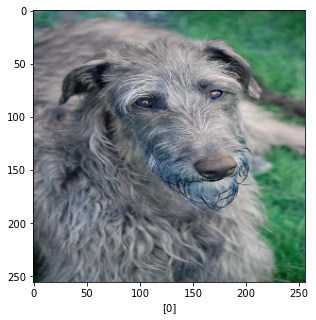

0

In [22]:
plot_img(0)
predict_img(0)